## Reading the Dataset

In [2116]:
from pandas import read_excel
import numpy as np
import random

my_sheet = 'Sheet1'
file_name = 'peerj-07-7559-s003.xls'
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head()) 
df1 = df

df=df.drop(['crop'],axis=1)
#df.columns=['crop','yield','price','CWR','CS','CMF','CI','CHL']
df.columns=['S_No','yield','price','CWR','prod','CS','CMF','CI','CHL']

   S. No.       crop  Yield kg/Ha  Price in Rs./Quintal  CWR in mm3/m2  \
0       1      paddy         3658                 141.0     62500.0000   
1       2     cholam          485                 157.0      7175.9333   
2       3      maize         7264                 132.5      5381.9500   
3       4  sugarcane       126360                  23.0       977.6800   
4       5     cotton         1837                 380.0     12916.6888   

   Productivity kg/m2  CS Rs/m2  CMF Rs/m2  CI Rs/m2  CHL Rs/m2  
0              0.4985    0.5986     0.7934    0.0332     2.8420  
1              0.0842    0.1716     0.2404    0.0000     1.0608  
2              0.8593    0.4172     1.1032    0.0320     2.8920  
3             13.0724    2.2602     1.2818    0.1620     9.5809  
4              0.1699    0.3200     0.8692    0.0000     5.1138  


## Preprocessing the Data

In [2117]:
df['Cost'] = df['CS'] + df['CMF'] + df['CI'] + df['CHL']
df['Income1'] = df['price'] * df['prod'] 
df['Cost_Per'] = df['Cost'] / np.sum(df['Cost'])
df['Income1_Per'] = df['Income1'] / np.sum(df['Income1'])
df['Profit'] = df['Income1'] - df['Cost']
df['Profit_Per'] = df['Profit'] / np.sum(df['Profit'])

## Fitness Function

In [2118]:
def fitness(sample_pop):
    x = []
    y = []
    for k in range (len(sample_pop)):
        f1 = []
        f2 = []
        for i in range (10):
            #print(sample_pop[k][i],df['Profit'][i])
            f1.append(sample_pop[k][i] * df['Profit'][i])
            f2.append(sample_pop[k][i] * df['CWR'][i]*.001)

        a = np.sum(f1)
        b = np.sum(f2)
        x.append(a)
        y.append(b)
    #print("x:",x)
        
    return x,y

## Pareto_Rank Function

In [2119]:
def pareto_rank(demo_pop):
    mp = []
    P_dash = demo_pop[:]
    #Q_dash = P_dash[:]
    ss_temp = ss[:]
    tt_temp = tt[:]
    R = []
    p_fit = []
    w_fit = []

    while len(P_dash) > 0:
        #print("I am new")
        F = []
        ss_new = []
        tt_new = []
        #print(P_dash)
        #print(i)
        i = 0
        while i < len(P_dash):
            #print("i:",i)
            F.append(P_dash[i])
            ss_new.append(ss_temp[i])
            tt_new.append(tt_temp[i])
            ind = F.index(P_dash[i])
            j = 0
            while j < len(F):
                #print("j:",j)
                if j!=ind:
                    #print('ss_new_j',ss_new[j])
                    #print('ss_i',ss[i])
                    #print('tt_new_j',tt_new[j])
                    #print('tt_i',tt[i])
                    if (ss_new[j]>ss_temp[i] and tt_new[j]<tt_temp[i]):
                        F.remove(P_dash[i])
                        #print("F1:",len(F))
                        #print('ss_sf1:',ss_new)
                        #print('tt_tf1:',tt_new)
                        ss_new.remove(ss_temp[i])
                        tt_new.remove(tt_temp[i])
                        #print('ss_s:',ss_new)
                        #print('tt_t:',tt_new)
                        break
                    elif (ss_new[j]<ss_temp[i] and tt_new[j]>tt_temp[i]):
                        F.remove(F[j])
                        #print("F:",len(F))
                        #print('ss_sf:',ss_new)
                        #print('tt_tf:',tt_new)
                        ss_new.remove(ss_new[j])
                        tt_new.remove(tt_new[j])
                        #print('ss_s:',ss_new)
                        #print('tt_t:',tt_new)
                j = j + 1
            i = i + 1
        if len(F) == 0:
            R.append(P_dash)
            p_fit.append(ss_new)
            w_fit.append(tt_new)
            P_dash = []
            ss_temp = []
            tt_temp = []
        else:
            R.append(F)
            for k in range (len(F)):
                ind = P_dash.index(F[k])
                P_dash.remove(F[k])
                p_fit.append(ss_temp[ind])
                w_fit.append(tt_temp[ind])
                ss_temp.remove(ss_temp[ind])
                tt_temp.remove(tt_temp[ind])
    
    #R_dash = []
    #for ii in range (len(R)):
        #for ll in range (len(R[ii])):
            #if len(R_dash) !=6 :
                #R_dash.append(R[ii][ll])
            #else:
                #break
    return R


## Rank_Compare Function

In [2120]:
def rank_comp(p1,p2):
    for i in range (len(par_rank)):
        if p1 in par_rank[i]:
            x = i
    for j in range (len(par_rank)):
        if p2 in par_rank[j]:
            y = j
    return x,y

## Mating_Pool Function

In [2121]:
def mating_pool(sample_pop):

    l = [0,1,2,3,4,5]
    t =[]
    ind = []
    mp = []
    for i in range (12):
        res = random.choice([ele for ele in l if ele not in t])
        t.append(res)
        ind.append(res)
        if i==5:
            t = []

    for i in range (0,12,2):
        p1 = ind[i]
        p2 = ind[i+1]
        #print(p1,p2)
        #if ss[p1%6]>ss[p2%6]:
            #mp_pro.append(p1)
        #else:
            #mp_pro.append(p2)
        #if tt[p1%6]>tt[p2%6]:
            #mp_wa.append(p2)
        #else:
            #mp_wa.append(p1)
        r1,r2 = rank_comp(sample_pop[p1%6],sample_pop[p2%6])
        if (r1>r2):
            mp.append(p1)
        else:
            mp.append(p2)
    return mp



## Crossover Function

In [2122]:
def crossover(sample_pop): 
    mop = []
    moc = []
    import math

    l =[0,1,2,3,4,5]
    rt = []
    for i in range (6):
        res = random.choice([ele for ele in l if ele not in rt])
        rt.append(res)

    ec = 20
    pc = .8
    off_sp = []

    for j in range (0,6,2):
        ran = random.random()
        bita = []
        ind1 = ma_pool_index[rt[j]]
        ind2 = ma_pool_index[rt[j+1]]
        if ran < pc:
            res = [random.random() for i in range(10)]
            for i in range (10):
                if res[i] <= .5:
                    bita.append(pow(2*res[i],(1/(ec+1))))
                else:
                    bita.append(pow((1/(2*(1-res[i]))),(1/(ec+1))))


            j1 = [.5*((1+bita[i])*sample_pop[ind1][i]+(1-bita[i])*sample_pop[ind2][i]) for i in range (10)]
            for v in range (len(j1)):
                if (j1[v]<2000):
                    j1[v] = 2000
                    mop.append(v)
            if sum(j1) > 40000:
                pp = sum(j1) - 40000
                pp = math.ceil(pp/5)
                for v in range (len(j1)):
                    if v not in mop:
                        j1[v] = j1[v] - pp

            j2 = [.5*((1-bita[i])*sample_pop[ind1][i]+(1+bita[i])*sample_pop[ind2][i]) for i in range (10)]
            for v in range (len(j2)):
                if (j2[v]<2000):
                    j2[v] = 2000
                    moc.append(v)
            if sum(j2) > 40000:
                pp = sum(j2) - 40000
                pp = math.ceil(pp/5)
                for v in range (len(j2)):
                    if v not in moc:
                        j2[v] = j2[v] - pp

            off_sp.append(j1)
            off_sp.append(j2)

        else:
            off_sp.append(sample_pop[ind1])
            off_sp.append(sample_pop[ind2])
    return off_sp

## Mutation Function

In [2123]:
def mutation(sample_pop):
    mop = []
    import math
    pm = .2
    em = 20
    off_sp_new = []
    for j in range (6):
        ran = random.random()
        dell = []
        if ran < pm:
            res = [random.random() for i in range(10)]
            for i in range (10):
                if res[i] < .5:
                    dell.append(pow(2*res[i],(1/(em+1)))-1)
                else:
                    dell.append(1-pow((2*(1-res[i])),(1/(em+1))))

            jj = [sample_pop[j][p]+(22000-2000)*dell[p] for p in range (10)]        
            for v in range (len(jj)):
                if (jj[v]<2000):
                    jj[v] = 2000
                    mop.append(v)
            if sum(jj) > 40000:
                pp = sum(jj) - 40000
                pp = math.ceil(pp/5)
                #print(pp)
                for v_p in range (len(jj)):
                    if v_p not in mop:
                        jj[v_p] = jj[v_p] - pp
            off_sp_new.append(jj)

        else:
            off_sp_new.append(sample_pop[j])
    return off_sp_new

## Run the cell to find out the Final Pareto Front

In [2124]:
per_stat = [.1,.1,.2,.2,.3,.02,.02,.02,.02,.02]
tt = []
ss = []
allocation = []

for asd in range (100):
    #print(asd)
    if asd == 0:
        #print("hu")
        for k in range (6):
            allocation_temp = []
            for i in range (10):
                allocation_temp.append(2000)
            pro = []
            twr = []
            random.shuffle(per_stat)
            for bb in range (10):
            #allocation[i] = allocation[i] + 20000* df['Profit_Per'][i]
                allocation_temp[bb] = allocation_temp[bb] + 20000* per_stat[bb]
                pro.append(allocation_temp[i] * df['Profit'][i])
                twr.append(allocation_temp[i] * df['CWR'][i])
            #allocation[i] = allocation[i] + 20000* a[0][i]
        #print("Allocation: ",allocation[i])
            #print("jj")
            if sum(allocation_temp) > 40000:
                pp = sum(allocation_temp) - 40000
                pp = math.ceil(pp/10)
                for v in range (len(j2)):
                    allocation_temp[v] = allocation_temp[v] - pp
        
            #print("pp")
            
            allocation.append(allocation_temp)
            t = np.sum(twr)
            s = np.sum(pro)
            tt.append(t)
            ss.append(s)
            #print(allocation)
            #print(s)
            #print(t)

    if asd != 0:
        pro,twr = fitness(allocation)       
    #allocation.append(allocation_temp)
        #t = np.sum(twr)
        #s = np.sum(pro)
        #ss.append(s)
        #tt.append(t)
        ss = pro[:]
        tt = twr[:]
    par_rank = pareto_rank(allocation)
    ma_pool_index = mating_pool(allocation)
    off_spring = crossover(allocation)
    off_spring_new = mutation(off_spring)
    allocation.extend(off_spring_new)

## Rank Processing

In [2125]:
#profit_mat 
x = []
y = []
for k in range (len(par_rank[0])):
    f1 = []
    f2 = []
    for i in range (10):
            #print(sample_pop[k][i],df['Profit'][i])
        f1.append(par_rank[0][k][i] * df['Profit'][i])
        f2.append(-par_rank[0][k][i] * df['CWR'][i]*.001)

    a = np.sum(f1)
    b = np.sum(f2)
    x.append(a)
    y.append(b)
    #print("x:",x)

## Pareto Front Visualization 

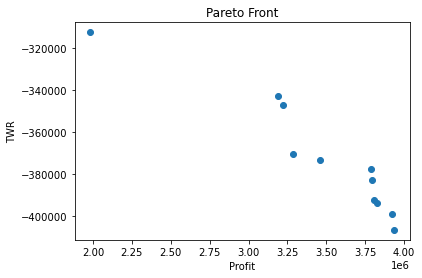

In [2126]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Pareto Front")
plt.xlabel("Profit")
plt.ylabel("TWR")
plt.show()